# Priors on physical properties imposed by $\tau$ model

In [1]:
import numpy as np 
from provabgs import infer as Infer
from provabgs import models as Models
from astropy.cosmology import Planck13

In [2]:
# --- plotting --- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
zred = 0.1
tage = Planck13.age(zred).value

In [4]:
np.random.seed(0)
prior_tau = Infer.load_priors([
    Infer.UniformPrior(0., 0.), 
    Infer.UniformPrior(0.3, 1e1), # tau SFH
    Infer.UniformPrior(0., 0.), # constant SFH
    Infer.UniformPrior(0., tage-1.), # start time
    Infer.UniformPrior(0., 0.),  # fburst
    Infer.UniformPrior(0., tage),  # tburst
    Infer.UniformPrior(1e-4, 1e1), # metallicity
    Infer.UniformPrior(0., 4.)
])

In [5]:
fsps = Models.FSPS(name='tau')

In [6]:
n_sample = 50000

In [7]:
thetas = np.array([prior_tau.sample() for i in range(n_sample)])

In [8]:
logSSFR_100myr = np.log10(fsps.avgSFR(thetas, zred, dt=0.1)) - thetas[:,0]
logSSFR_1gyr = np.log10(fsps.avgSFR(thetas, zred, dt=1.)) - thetas[:,0]
logZmw = np.log10(fsps.Z_MW(thetas, zred))

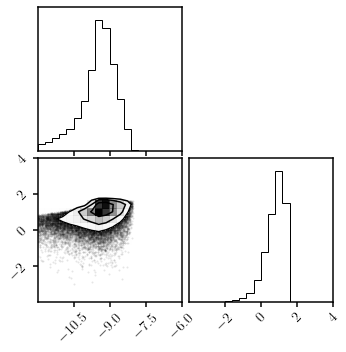

In [9]:
fig = DFM.corner(
    np.array([logSSFR_100myr[np.isfinite(logSSFR_100myr)], logZmw[np.isfinite(logSSFR_100myr)]]).T, 
    range=[(-12, -6), [-4., 4]]
)

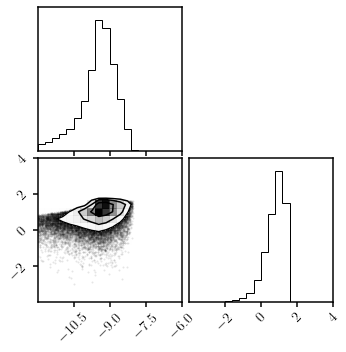

In [10]:
fig = DFM.corner(
    np.array([logSSFR_100myr[np.isfinite(logSSFR_1gyr)], logZmw[np.isfinite(logSSFR_1gyr)]]).T, 
    range=[(-12, -6), [-4., 4]]
)